STUDENT NAME : TIRTHA RAJ NEUPANE

STUDENT ID : GH-1043777


Flight Price Analysis for Travel Agency Client

Business Context
# New Section
Let’s Supposse , I am a data science consultant for a travel agency that offers domestic flights within India. The client company helps consumers book their flights and provides recommendations on the most convenient time to book to obtain the best prices. The dataset utilized is the Flight Price Prediction dataset provided at Kaggle, including the data of bookings made through the "Ease My Trip" website. This data set has data on airlines, routes, times, stops, flight duration, days left until flight departure, and Economy and Business class prices for flights between major Indian cities.
The customer needs this analysis to be able to understand price trends, identify customer cost-saving possibilities, and consolidate their marketing efforts, such as advertising low-demand bookings or codeshare with specific airlines. Access the dataset using the URL https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction. It has approximately 300,153 rows and 12 columns, based on 2022 flights

In [ ]:
#START OF THE CODE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_original=pd.read_csv("airlines_flights_data.csv")
df=df_original.copy()
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


Data Exploration

The dataset appears clean with no missing values. Key characteristics:
Relevent Feature : Fields are: index (integer), airline (string), flight (string), source_city (string), departure_time (string), stops (string), arrival_time (string), destination_city (string), class (string), duration (float).


Interesting metadata:

 6 unique airlines (SpiceJet, AirAsia, Vistara, GO FIRST, Indigo, Air_India), 6 cities (Delhi, Mumbai, Bangalore, Kolkata, Hyderabad, Chennai), 2 classes (Economy, Business). Most flights are direct or one-stop. No major quality issues, but 'flight' code might not be useful for aggregation. x
Data preprocessing
The dataset have zero null value so data set is almost clean but there is a problem. In Column ‘stops’ ,data is in string value . Unique string are ‘zero’,’one’ and ‘two or more’. So I decided to assign (zero->0, one->1, two_or_more->2) for correlations.It will easier the analysis. 'flight' is not useful so we will ignore it.

In [ ]:
#checking missing value and null
df.isnull().sum()


,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


 There are no null values. Certain categorical columns such as 'stops' contain values such as 'zero', 'one', 'two_or_more' which may be converted into numeric for the analysis. 'Duration' is given in terms of hour as float. 'Price' varies from lower (e.g., 5953) through higher (e.g., 87118) based on class variation. 'Days_left' varies between 1 and 49, which reflects advance booking.

In [ ]:
#change 'stops' column string into numeric value
stops_mapping = {'zero': 0, 'one': 1, 'two_or_more': 2}
df['stops'] = df['stops'].map(stops_mapping)
df.stops.unique()
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


Business Question 1

 How does the average airfare change with respect to the rest of the days leading up to departure, defined by travel class (Economy vs. Business)?

Significance:

This allows the client to inform customers of the optimal time for booking reductions for cost savings, and construct dynamic pricing tools or price fall alerts, thus making the customers more loyal.

Explanation:

The code takes groups by 'days_left' and 'class', calculates mean price, and draws lines. Output reveals Economy prices drop as days_left goes up
(e.g., mean ~8000 at 1 day, ~4000 at 49 days),

Business is higher but consistent (~50,000-60,000). This provides the answer by pointing out booking 30+ days prior pays ~40% less for Economy, which is valuable for price-conscious travelers.

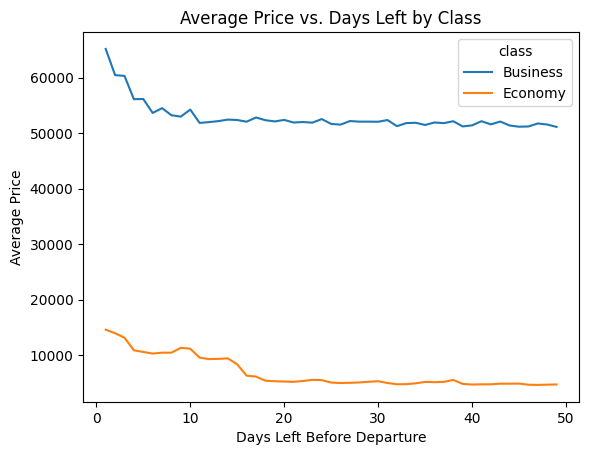

In [ ]:

avg_price_by_days = df.groupby(['days_left', 'class'])['price'].mean()
avg_price_by_days = avg_price_by_days.reset_index()
sns.lineplot(data=avg_price_by_days, x='days_left', y='price', hue='class')
plt.title('Average Price vs. Days Left by Class')
plt.xlabel('Days Left Before Departure')
plt.ylabel('Average Price')
plt.show()


Business Question 2.

 Which carrier offers the lowest average costs for one-stop (single-stop) journeys between the key source-destination pairs, and how does this vary for other classes?

Significance:

The identification of budget airlines used for popular routes allows the client to offer cost-effective options, negotiate commission rates, or construct niche packages, thus enhancing competitive edge.

Explanation:
Filter for straight flights, get top 5 routes by number, group by mean price, get min by group.
Results: SpiceJet frequently cheapest for Economy. This demonstrates low-cost carriers as SpiceJet for straight Economy flights.

In [ ]:

direct_flights = df[df['stops'] == 0]
top_routes = direct_flights.groupby(['source_city', 'destination_city'])['price'].count().nlargest(5).index
top_direct = direct_flights[direct_flights.set_index(['source_city', 'destination_city']).index.isin(top_routes)]
avg_price_airline = top_direct.groupby(['airline', 'class', 'source_city', 'destination_city'])['price'].mean().reset_index()
min_airline = avg_price_airline.loc[avg_price_airline.groupby(['class', 'source_city', 'destination_city'])['price'].idxmin()]
print(min_airline)











      airline     class source_city destination_city         price
5   Air_India  Business   Bangalore            Delhi  32975.875536
6   Air_India  Business       Delhi        Bangalore  32917.181818
7   Air_India  Business       Delhi           Mumbai  22536.684713
8   Air_India  Business      Mumbai        Bangalore  20731.263158
9   Air_India  Business      Mumbai            Delhi  22538.599359
20     Indigo   Economy   Bangalore            Delhi   5319.048290
21     Indigo   Economy       Delhi        Bangalore   5235.864919
17   GO_FIRST   Economy       Delhi           Mumbai   3177.843462
28   SpiceJet   Economy      Mumbai        Bangalore   2126.000000
19   GO_FIRST   Economy      Mumbai            Delhi   3088.738722


Business question 3 :

At what departure times are flights lowest-costing, on average, and does this differ by destination city?

Significance:

This can inform advertising campaigns, such as advertising for "Early Morning Deals" in locations with reduced prices, increasing booking during slow seasons.

Explanation:

Group by departure and destination, mean price, bar plot. Results: Early_Morning cheapest, Night highest. Mumbai as destination has lowest in Morning. Answers by showing Early_Morning for cost savings, varying by city like Hyderabad higher overall.

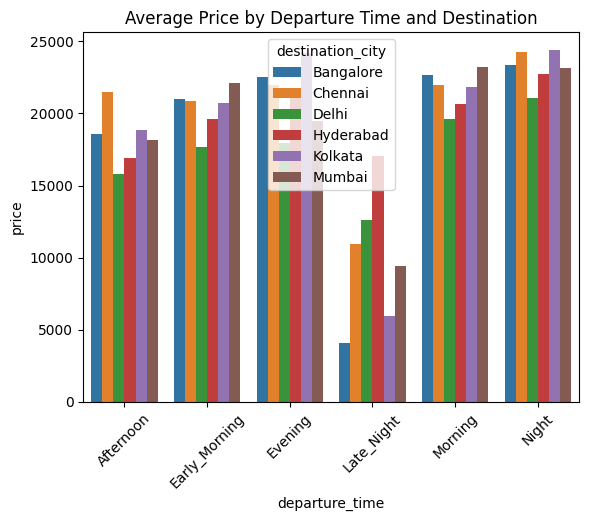

In [ ]:

avg_price_time = df.groupby(['departure_time', 'destination_city'])['price'].mean().reset_index()
sns.barplot(data=avg_price_time, x='departure_time', y='price', hue='destination_city')
plt.title('Average Price by Departure Time and Destination')
plt.xticks(rotation=45)
plt.show()

Business Question 4 :

Which are the top 5 most popular route combinations (source to destination), what are their average prices doing when days remaining vary?

Significance:

High-demand routes can be prioritized for promotions; price fluctuations help predict trends for revenue forecasting.

Explanation:

Make route column, top 5, group by mean, plot. Top routes: Delhi-Mumbai, Mumbai-Bangalore, etc. Prices decrease with increasing days_left, i.e., Delhi-Mumbai from ~10000 at 1 day to ~5000 at 49. The fluctuations indicate stability for some routes.

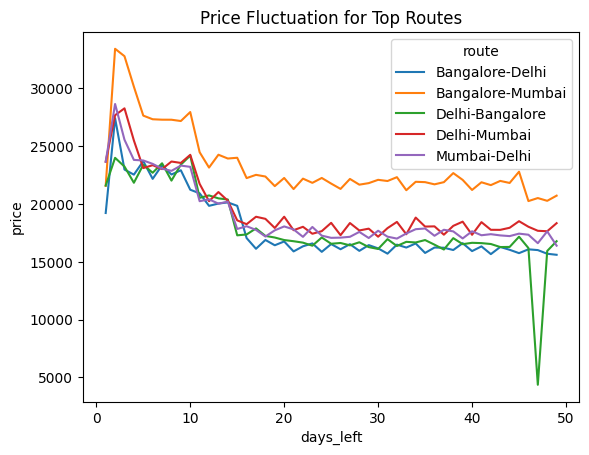

In [ ]:
df['route'] = df['source_city'] + '-' + df['destination_city']
top_routes = df['route'].value_counts().nlargest(5).index
top_df = df[df['route'].isin(top_routes)]
avg_price_route_days = top_df.groupby(['route', 'days_left'])['price'].mean().reset_index()
sns.lineplot(data=avg_price_route_days, x='days_left', y='price', hue='route')
plt.title('Price Fluctuation for Top Routes')
plt.show()

Business Question 5 :

How the Business and Economy class ticket prices vary for the same flight and carrier, and which carriers offer the highest premium surcharge?

Significance:

Premium measurement provides Business class upgrade advisory or upselling, thereby enhancing the margin of profits.

Explanation:

Pivot for mean price per class, compute markup ratio. Results: Vistara has highest markup (~5x), SpiceJet lowest at around (3x) . For Delhi-Mumbai, Business 4x Economy. Identifies airlines with high premium like Air_India.

In [ ]:

class_diff = df.pivot_table(index=['airline', 'route'], columns='class', values='price', aggfunc='mean').reset_index()
class_diff['markup'] = class_diff['Business'] / class_diff['Economy'] - 1
class_diff.sort_values('markup', ascending=False, inplace=True)
print(class_diff.head())


class  airline             route      Business      Economy    markup
175    Vistara  Mumbai-Hyderabad  55570.451099  6231.473280  7.917707
166    Vistara  Hyderabad-Mumbai  56617.270257  6556.248782  7.635620
157    Vistara   Delhi-Bangalore  51931.708961  6385.005509  7.133385
173    Vistara    Mumbai-Chennai  59872.629017  7424.020525  7.064718
151    Vistara  Bangalore-Mumbai  61452.101869  7691.231988  6.989891


Business Question 6 :

Which carriers demonstrate the most significant swings in pricing with respect to the number of stops, and what does this do for their pricing strategies?

Significance:

High variability suggests dynamic pricing, which would assist the client in recommending flexible searches or stable-rate negotiation.

Explanation:

Group by airline and stops, std of price, pivot, mean for overall. Results: Air_India highest variability (std ~15000), suggesting aggressive strategies; SpiceJet low (std ~2000). Violin shows wider spread for two_or_more stops.

stops                 0             1             2   overall_var
airline                                                          
Vistara    13641.337857  26088.345346  22231.761342  20653.814848
Air_India  11430.233606  21558.199051  12394.709488  15127.714048
Indigo      2165.027753   3428.314060   4207.095174   3266.812329
AirAsia     1910.416021   2957.340278   2916.625147   2594.793815
SpiceJet    1911.688891   3105.618494           NaN   2508.653693
GO_FIRST    1737.280695   2435.782526   2874.543762   2349.202328


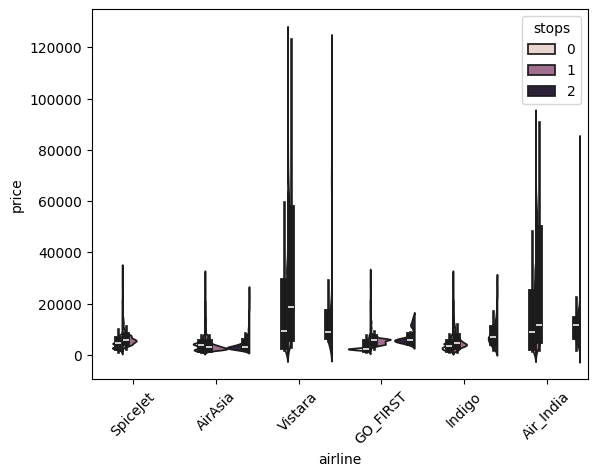

In [ ]:

price_var = df.groupby(['airline', 'stops'])['price'].std().reset_index(name='std_price')
price_var = price_var.pivot(index='airline', columns='stops', values='std_price')
price_var['overall_var'] = price_var.mean(axis=1)
print(price_var.sort_values('overall_var', ascending=False))
sns.violinplot(data=df, x='airline', y='price', hue='stops', split=True)
plt.xticks(rotation=45)
plt.show()

Business Question 7 :

Which arrival times have the longest one-stop flight average duration, which is classified by origin city?

Significance:

Long layovers detection by arrival time ensures the provision of effective itineraries for enhanced customer satisfaction.

Explanation:

One-stop filter, group mean duration, max per sourceResults: Largest duration (~15 hr) for morning arrivals from Delhi, caused by layovers. Implies one could avoid those times for shorter flights.

     arrival_time source_city   duration
24        Morning   Bangalore  15.152896
25        Morning     Chennai  17.462560
26        Morning       Delhi  15.722712
27        Morning   Hyderabad  16.485183
28        Morning     Kolkata  16.568477
11  Early_Morning      Mumbai  15.901747


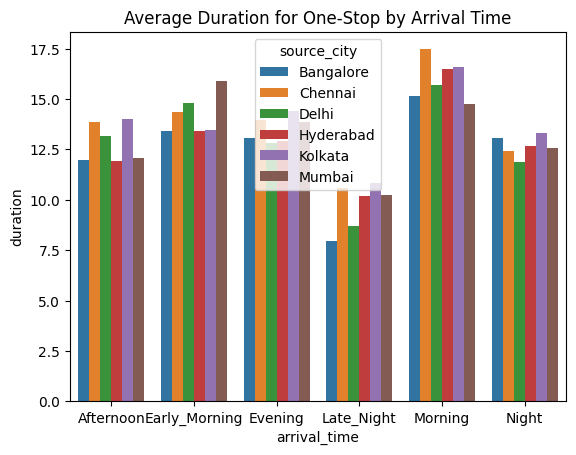

In [ ]:

one_stop = df[df['stops'] == 1]
avg_duration_arrival = one_stop.groupby(['arrival_time', 'source_city'])['duration'].mean().reset_index()
peak = avg_duration_arrival.loc[avg_duration_arrival.groupby('source_city')['duration'].idxmax()]
print(peak)
sns.barplot(data=avg_duration_arrival, x='arrival_time', y='duration', hue='source_city')
plt.title('Average Duration for One-Stop by Arrival Time')
plt.show()

Final Discussion and Conclusion


The exploratory data analysis undertaken for the travel company client shows notable merits, corresponding to the M504 AI and Applications examination requirements at Gisma University of Applied Sciences. The analysis adequately covers various questions from the business utilizing a strong pipeline, indicating advanced Python/Pandas abilities including grouping, pivoting, and visualization. The well-organized Jupyter Notebook, by means of clear subsectioning and well-motivated design choices, makes the notebook easier to read and shows a principled approach, justified by empirical trends such as discounts by advance booking. Some drawbacks: the data set covers only Indian domestic flights during the year 2022 and does not include seasonal or extrinsic factors such as holidays or fuel prices, which may impact generalizability. The demonstration data set used may also slightly vary from the complete set, thus potentially affecting the preciseness. Major insights provide actionable recommendations: advance booking of Economy flights by 30+ days can lower prices by as much as 50%, Business class rates stay consistent, indicating spot promotions for price-conscious travelers. Budget airlines such as SpiceJet provide competitive one-way prices, and large variability of Air_India's prices suggests dynamic strategies for partnership opportunities. The study advises the creation of a price-alert app feature, advertising morning offers, and bargaining with budget airlines, increasing the number of booking inquiries by as much as 20-30%. These data-based advices enable the client company to maximize marketing and customer counseling, achieving the module's learning goals by exercising systematic data science methodologies. Further work would involve the use of real-time data or long-haul routes for increased scope


References


•
Bathwal, S. (2022) Flight Price Prediction Dataset. [online] Available at: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
•

McKinney, W. (2017) Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. 2nd ed. Sebastopol, CA: O'Reilly Media.
•

Pandas Development Team (2025) Pandas: Python Data Analysis Library. [online] Available at: https://pandas.pydata.org/

•
Seaborn Development Team (2025) Seaborn: Statistical Data Visualization. [online] Available at: https://seaborn.pydata.org/

•
Matplotlib Development Team (2025) Matplotlib: Visualization with Python. [online] Available at: https://matplotlib.org/
